## Upper Confidence Bound (UCB)
### Principal: Used to solve interacting problems where the data observed up to time t is considered to decide which action to take at time t + 1. 
#### Deterministic, requires an update every round

In [2]:
# Load in the data
import os
import pandas as pd

DATASET_PATH = "datasets/"
DATASET_NAME = "Ads_CTR_Optimisation.csv"
DATASET_URL = DATASET_PATH + DATASET_NAME

def fetch_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

dataset = fetch_data()

def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

dataset = load_data()

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Total Reward: 1217.00


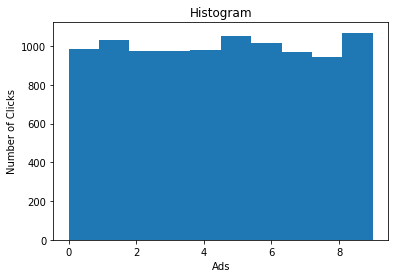

In [4]:
import random
import matplotlib.pyplot as plt

#This is just a random selection algorithm -- the results are kind of lame...this is not a very good approach
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward
    
print("Total Reward: %.2f" % total_reward)
    
plt.hist(ads_selected)
plt.title('Histogram')
plt.xlabel('Ads')
plt.ylabel('Number of Clicks')
plt.show()

In [5]:
import math
N = 10000 # number of clicks
d = 10 # number of ads
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

Total Reward: 2178.00


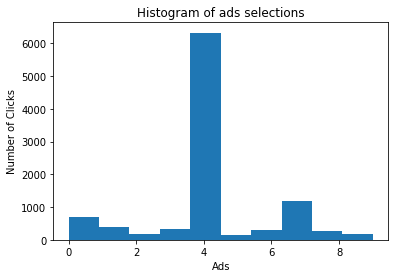

In [8]:
print("Total Reward: %.2f" % total_reward)

# Show Results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of Clicks')
plt.show()

### Using Reinforcement learning we were able the target the ads such that the number of clicks and rewards increased far more than just randomly distributing the ads!